In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")


In [2]:
BTC = pd.read_csv('BTC-USD.csv')
BTC['Date'] = pd.to_datetime(BTC['Date'])
# print(bitcoin.head())

In [3]:
SPX = pd.read_csv('SPX.csv')
SPX['Date'] = pd.to_datetime(SPX['Date'])
# print(VOO.head())

In [4]:
NASDAQ = pd.read_csv('NASDAQ.csv')
NASDAQ['Date'] = pd.to_datetime(NASDAQ['Date'])
# print(NASDAQ.head())

In [5]:
ETH = pd.read_csv('ETH-USD.csv')
ETH['Date'] = pd.to_datetime(ETH['Date'])
# print(ethereum.head())

In [6]:
# https://fred.stlouisfed.org/series/UNRATE
unemployment = pd.read_csv('UNRATE.csv')
unemployment['Date'] = pd.to_datetime(unemployment['DATE'])
unemployment.drop(columns=['DATE'], inplace=True)
# print(unemployment.head())

In [7]:
# https://fred.stlouisfed.org/series/GDPC1
GDP = pd.read_csv('GDPC1.csv')
GDP['Date'] = pd.to_datetime(GDP['DATE'])
GDP.drop(columns=['DATE'], inplace=True)
# print(GDP.head())

In [8]:
# https://fred.stlouisfed.org/series/CPIAUCSL
CPI = pd.read_csv('CPIAUCSL.csv')
CPI['Date'] = pd.to_datetime(CPI['DATE'])
CPI.drop(columns=['DATE'], inplace=True)
# print(CPI.head())

In [9]:
# https://fred.stlouisfed.org/series/FEDFUNDS
FFR = pd.read_csv('FEDFUNDS.csv')
FFR['Date'] = pd.to_datetime(FFR['DATE'])
FFR.drop(columns=['DATE'], inplace=True)
# print(FFR.head())

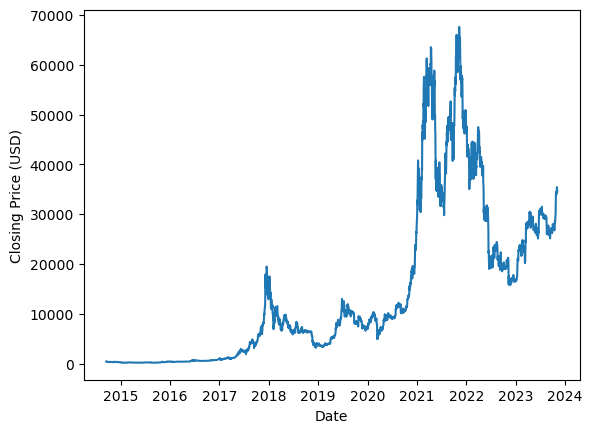

In [10]:
sns.lineplot(x='Date', y='Close', data=BTC)
plt.ylabel('Closing Price (USD)')
plt.xlabel('Date')
plt.show()

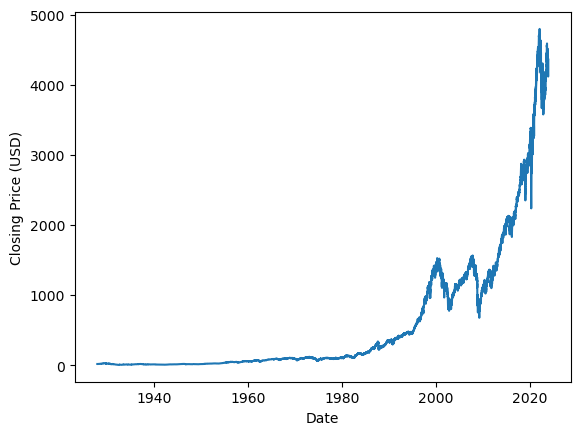

In [11]:
sns.lineplot(x='Date', y='Close', data=SPX)
plt.ylabel('Closing Price (USD)')
plt.xlabel('Date')
plt.show()


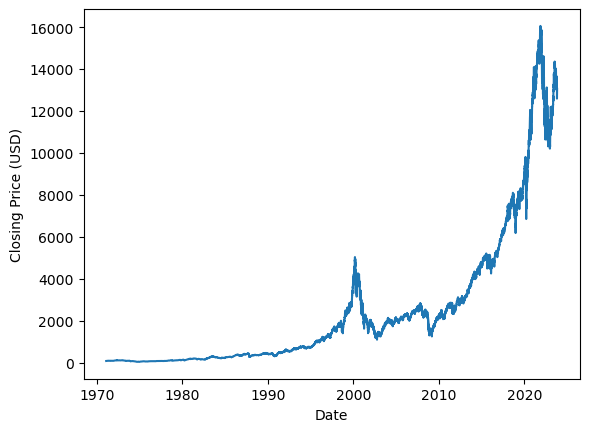

In [12]:
sns.lineplot(x='Date', y='Close', data=NASDAQ)
plt.ylabel('Closing Price (USD)')
plt.xlabel('Date')
plt.show()

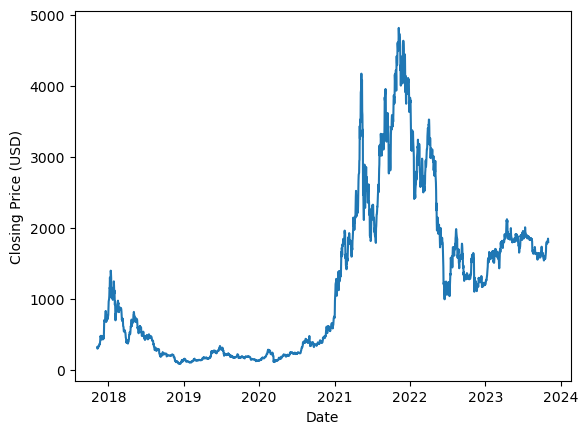

In [13]:
sns.lineplot(x='Date', y='Close', data=ETH)
plt.ylabel('Closing Price (USD)')
plt.xlabel('Date')
plt.show()

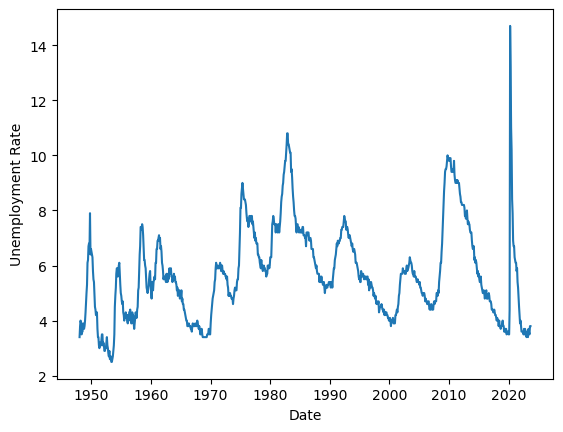

In [14]:
sns.lineplot(x='Date', y='UNRATE', data=unemployment)
plt.ylabel('Unemployment Rate')
plt.xlabel('Date')
plt.show()

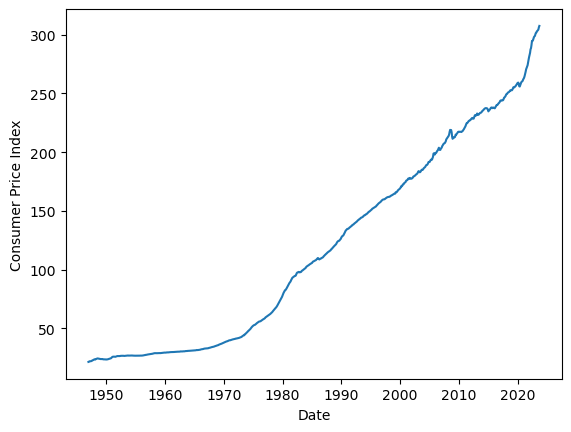

In [15]:
sns.lineplot(x='Date', y='CPIAUCSL', data=CPI)
plt.ylabel('Consumer Price Index')
plt.xlabel('Date')
plt.show()

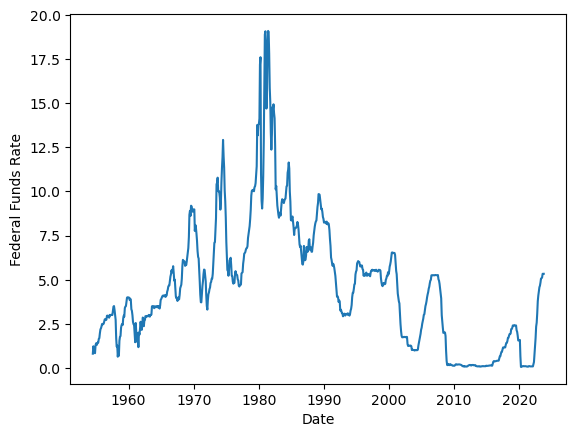

In [16]:
sns.lineplot(x='Date', y='FEDFUNDS', data=FFR)
plt.ylabel('Federal Funds Rate')
plt.xlabel('Date')
plt.show()

In [17]:
GDP.rename(columns={'GDPC1': 'GDP'}, inplace=True)
CPI.rename(columns={'CPIAUCSL': 'CPI'}, inplace=True)
FFR.rename(columns={'FEDFUNDS': 'FFR'}, inplace=True)

# Filter the DataFrames from mid-2019
start_date = pd.to_datetime("2017-11-09")
GDP_filtered = GDP[GDP['Date'] >= start_date]
unemployment_filtered = unemployment[unemployment['Date'] >= start_date]
ETH_filtered = ETH[ETH['Date'] >= start_date]
NASDAQ_filtered = NASDAQ[NASDAQ['Date'] >= start_date]
SPX_filtered = SPX[SPX['Date'] >= start_date]
BTC_filtered = BTC[BTC['Date'] >= start_date]
CPI_filtered = CPI[CPI['Date'] >= start_date]
FFR_filtered = FFR[FFR['Date'] >= start_date]

# base dataframe
base_df = pd.concat([BTC_filtered['Date'], ETH_filtered['Date'], NASDAQ_filtered['Date'], SPX_filtered['Date']], ignore_index=True).drop_duplicates().sort_values().reset_index(drop=True)

# dataframe for Covid
covid_data = base_df.to_frame(name='Date')
covid_data = pd.merge(covid_data, GDP_filtered, on='Date', how='left')
covid_data = pd.merge(covid_data, unemployment_filtered, on='Date', how='left')
covid_data = pd.merge(covid_data, BTC_filtered, on='Date', how='left')
covid_data = pd.merge(covid_data, ETH_filtered, on='Date', how='left', suffixes=('', '_ETH'))
covid_data = pd.merge(covid_data, NASDAQ_filtered, on='Date', how='left', suffixes=('', '_NASDAQ'))
covid_data = pd.merge(covid_data, SPX_filtered, on='Date', how='left', suffixes=('', '_SPX'))

# Forward fill the GDP and Unemployment Rate
covid_data['GDP'] = covid_data['GDP'].ffill()
covid_data['UNRATE'] = covid_data['UNRATE'].ffill()

# Merge the CPI and Federal Funds Rate using a left join
covid_data = pd.merge(covid_data, CPI_filtered, on='Date', how='left')
covid_data = pd.merge(covid_data, FFR_filtered, on='Date', how='left')

# Forward fill the CPI and Federal Funds Rate
covid_data['CPI'] = covid_data['CPI'].ffill()
covid_data['CPI'] = covid_data['CPI'].bfill()
covid_data['FFR'] = covid_data['FFR'].ffill()
covid_data['FFR'] = covid_data['FFR'].bfill()

# Sort and reset index (should already be sorted)
covid_data.reset_index(drop=True, inplace=True)

covid_data.to_csv('covid_data.csv', index=False)
print(covid_data.head())
# print(covid_data['CPI'].isna().sum())

        Date  GDP  UNRATE         Open         High          Low        Close  \
0 2017-11-09  NaN     NaN  7446.830078  7446.830078  7101.520020  7143.580078   
1 2017-11-10  NaN     NaN  7173.729980  7312.000000  6436.870117  6618.140137   
2 2017-11-11  NaN     NaN  6618.609863  6873.149902  6204.220215  6357.600098   
3 2017-11-12  NaN     NaN  6295.450195  6625.049805  5519.009766  5950.069824   
4 2017-11-13  NaN     NaN  5938.250000  6811.189941  5844.290039  6559.490234   

     Adj Close        Volume    Open_ETH  ...  Adj Close_NASDAQ  \
0  7143.580078  3.226250e+09  308.644989  ...       6750.049805   
1  6618.140137  5.208250e+09  320.670990  ...       6750.939941   
2  6357.600098  4.908680e+09  298.585999  ...               NaN   
3  5950.069824  8.957350e+09  314.690002  ...               NaN   
4  6559.490234  6.263250e+09  307.024994  ...       6757.600098   

   Volume_NASDAQ     Open_SPX     High_SPX      Low_SPX    Close_SPX  \
0   2.243500e+09  2584.000000  2586.50

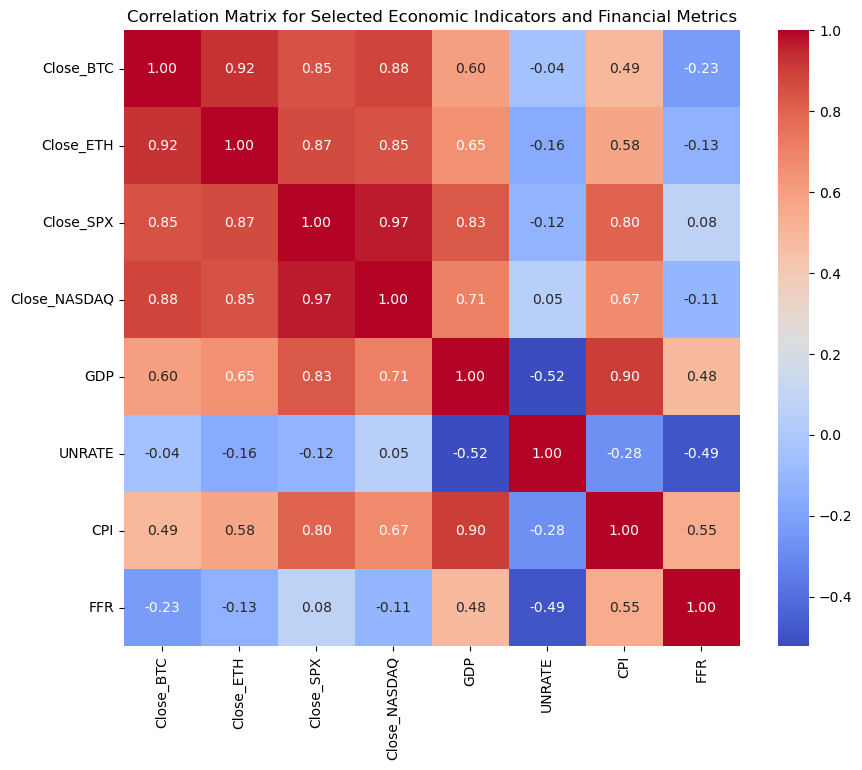

In [18]:
covid_data.rename(columns={'Close': 'Close_BTC'}, inplace=True)
columns_of_interest = ['Close_BTC', 'Close_ETH', 'Close_SPX', 'Close_NASDAQ', 'GDP', 'UNRATE','CPI', 'FFR']
covid_data_interest = covid_data[columns_of_interest]
correlation_matrix = covid_data_interest.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix for Selected Economic Indicators and Financial Metrics")
plt.show()


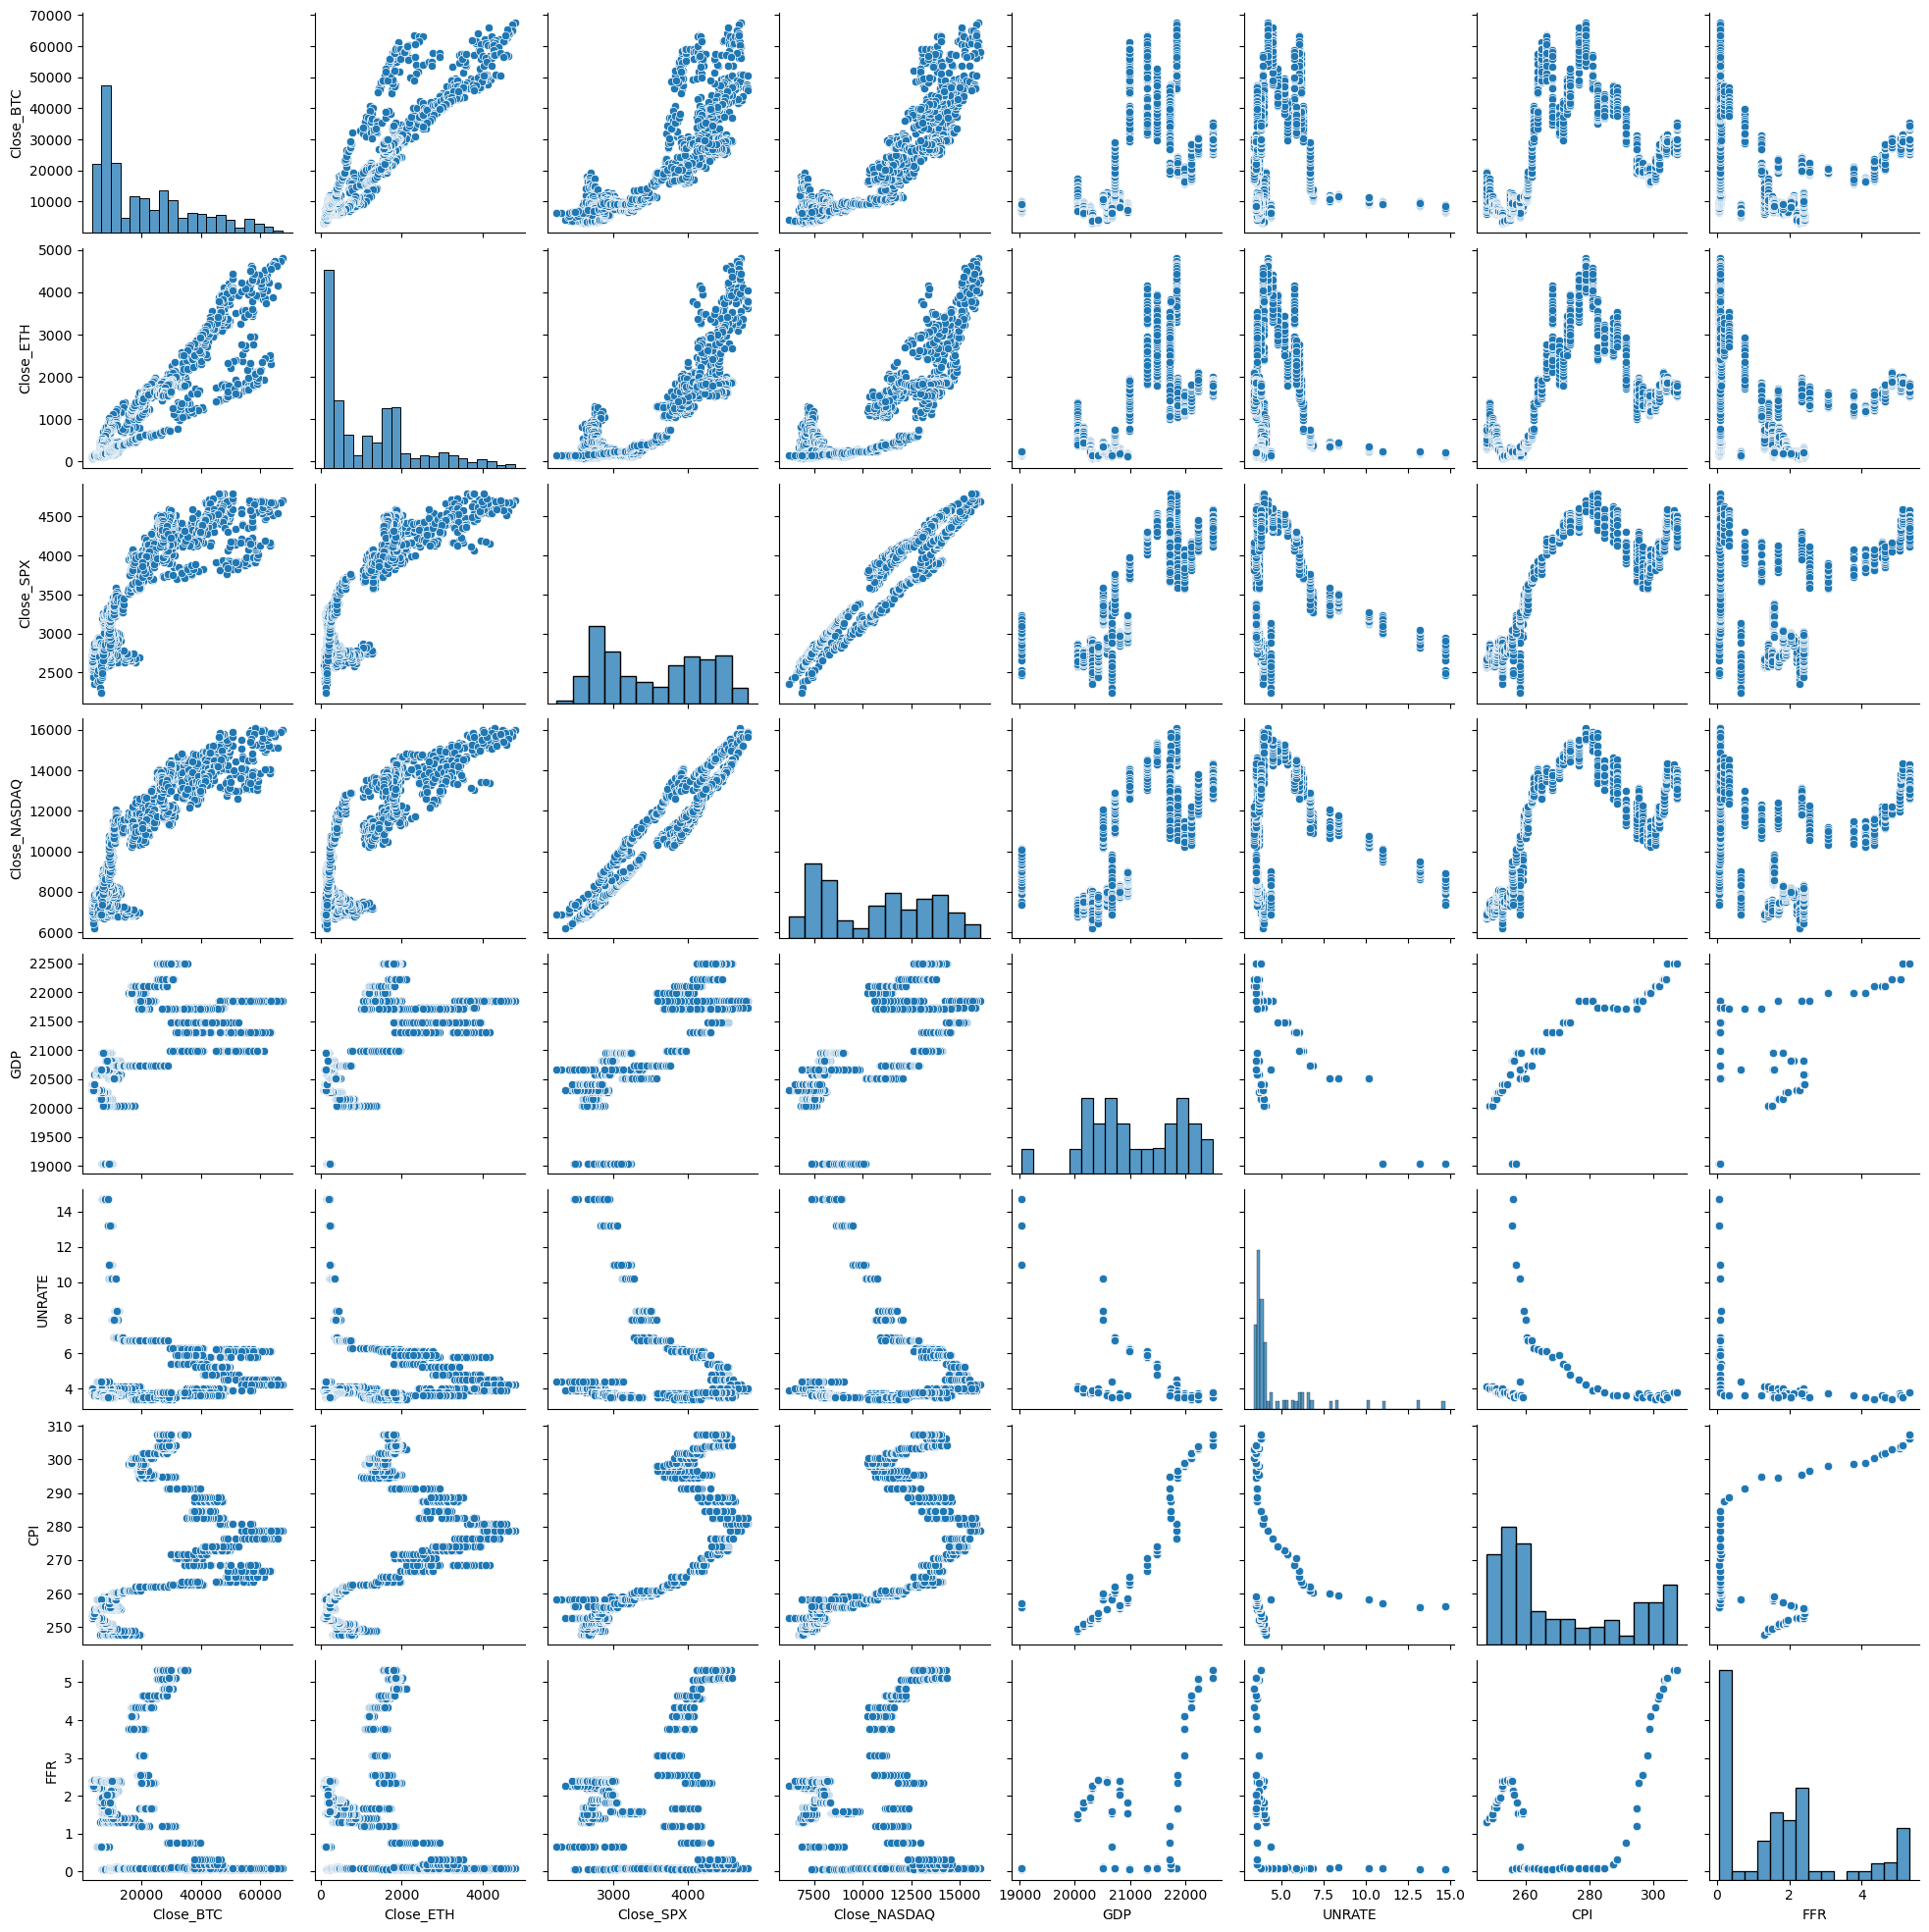

In [19]:
sns.pairplot(covid_data_interest)
plt.show()